In [2]:
!pip install gensim


In [3]:
import gensim
import pandas as pd
import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [5]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [7]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [8]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document


For 1b, I aimed at isolating specific dimensions in word embeddings and observed how they can change when applied to various words. 
One of the most interesting results I encountered came from isolating the "plural" dimension using words like "juice" and "papaya." When I applied the plural vector to "papaya," the result "papayas" was expected. However, when I applied the same vector to "juice," the result was surprising. The embedding didn’t yield the straightforward plural "juices" but instead brought up related concepts around different types of juices, such as "apple juice" and "orange juice." This highlighted that "juice" is often treated as a mass noun, so it doesn’t pluralize in the same way a count noun like "papaya" does. Next, I explored the "cultural vector" using "Kpop" and "Thailand." Adding this cultural dimension to other words like "music" or "country" brought up interesting associations with specific artists or cultural references. For example, when I added a cultural direction to "Thailand," it returned results related to Thai pop culture, tourism, and local artists, which made sense given Wikipedia’s extensive coverage of global topics.

*copy and pasted from group document

Part 2: Visualization and Embeddings in Space

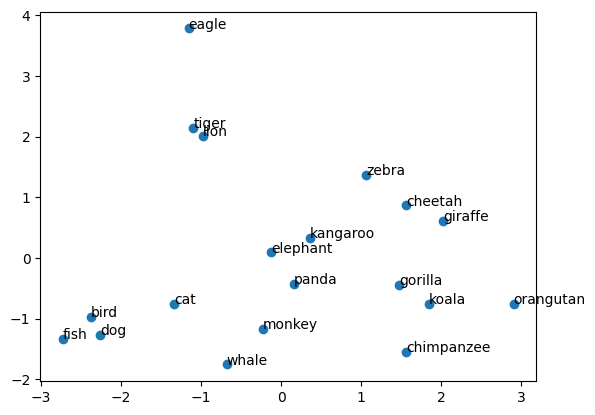

In [9]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

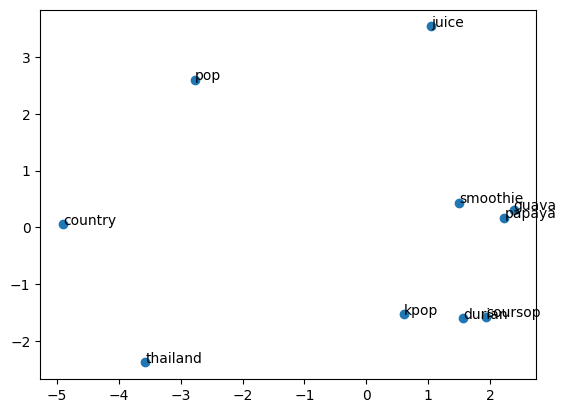

In [10]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

#visualize pca of word embeddings

words=["papaya","juice","kpop","thailand","guava","soursop","country","pop","smoothie","durian" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


I noticed that the fruits were grouped separately as well as the drinks, which was interesting. It made sense for “country” to be in the middle of Thailand and kpop because country has multiple meanings. What didn’t make sense to me was how juice was so far away from smoothie and all the other fruits. 

In [11]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

juice = model['juice']

# Getting the most similar words

print(model.most_similar('juice'))

# Getting the similarity between two words

print(model.similarity('juice', 'smoothie'))


[('lemon', 0.8233426809310913), ('vinegar', 0.7732073068618774), ('lime', 0.7639415860176086), ('sauce', 0.7204378843307495), ('grapefruit', 0.7199090719223022), ('syrup', 0.7161567807197571), ('yogurt', 0.7134124636650085), ('soda', 0.7080042362213135), ('cream', 0.7028740048408508), ('sugar', 0.7018995881080627)]
0.47305423


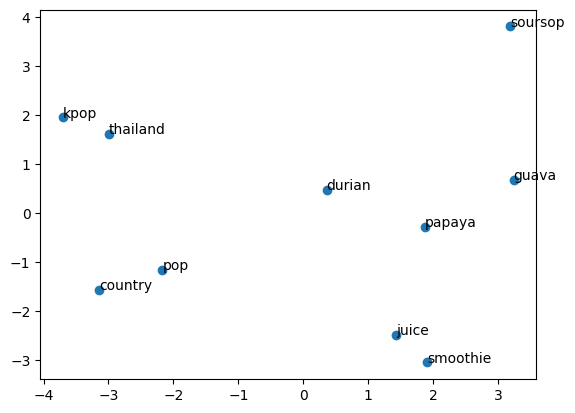

In [12]:
words=["papaya","juice","kpop","thailand","guava","soursop","country","pop","smoothie","durian" ]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

This graph made more sense to me because it was very clear what the categories were. I think the difference was that the twitter model took the words more literally. Durian, papaya, and guava are all fruit no matter where they come from. It is strange that soursop is not combined with them. kpop and Thailand are both associated with Asia. Country and pop are music genres and juice and smoothies are variations of each other. The training data might not consider many aspects or the less common meanings each word may have.

Part 3: Embedding reddit posts

In [41]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']='uiuc'
mich['label']='mich'

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data




,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,uiuc
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,uiuc
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,uiuc
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,uiuc
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,uiuc
...,...,...,...,...,...,...,...
942,942,2024-08-30 14:17:22,802,r/technicallythetruth,Khornatejester,2,mich
2189,2189,2024-08-26 21:42:03,417,I think most state schools ARE significantly w...,Jetonblu,22,mich
5797,5797,2024-07-25 22:18:46,1,All dorms have microwaves in residential lounges,RunningEncyclopedia,4,mich
3759,3759,2024-08-16 08:42:32,1,Pretty annoying and if you can get experience ...,shamalalala,2,mich


In [42]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = mich['text'].apply(clean)
data = data.dropna()
data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abandon,abandoned,abbreviation,abet,abhorrent,...,zionists,zip,zola,zone,zones,zoning,zoo,zoom,zoomer,zoomers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

principalComponents = pca.fit_transform(bow_df)


In [44]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = data['label'].values

principalDf

,principal component 1,principal component 2,label
0,4.286941,-1.881648,uiuc
1,-0.776742,0.728377,uiuc
2,-0.180165,0.581857,uiuc
3,-1.694898,-0.930038,uiuc
4,-1.560701,-0.765114,uiuc
...,...,...,...
7302,-2.734720,0.122821,mich
7303,-0.584618,0.522016,mich
7304,-2.395676,0.046736,mich
7305,1.142827,-2.242945,mich


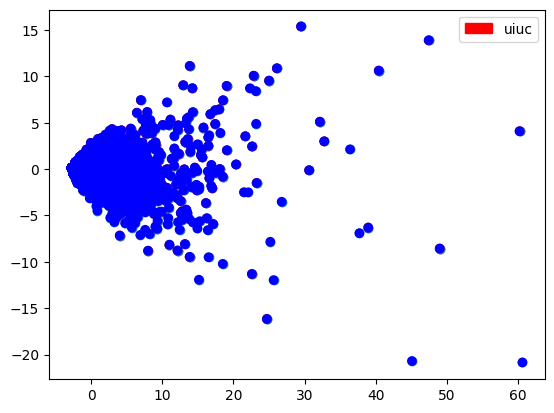

In [49]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])


# plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=data['label'])
colors = {'uiuc':'red', 'mich':'blue'}

plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"], c=principalDf["label"].apply(lambda x: colors[x]))
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='uiuc')

blue_patch = mpatches.Patch(color='blue', label='mich')

plt.legend(handles=[red_patch, blue_patch])

plt.show()


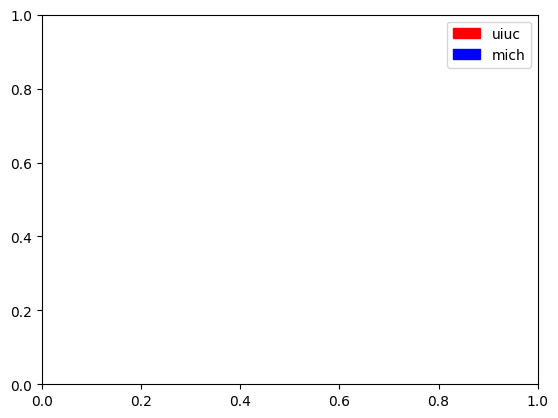

In [19]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='uiuc')

blue_patch = mpatches.Patch(color='blue', label='mich')

plt.legend(handles=[red_patch, blue_patch])

plt.show()

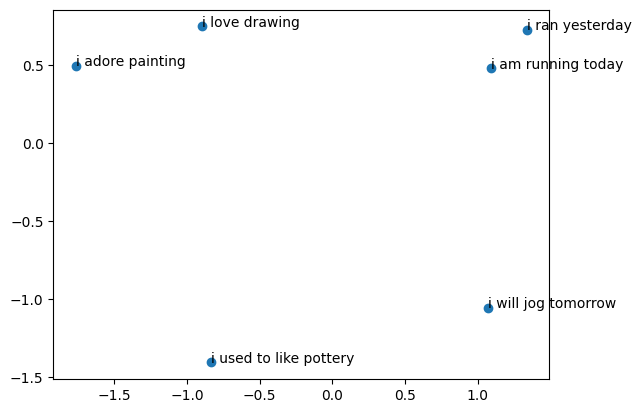

In [16]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\rzhao\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rzhao\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


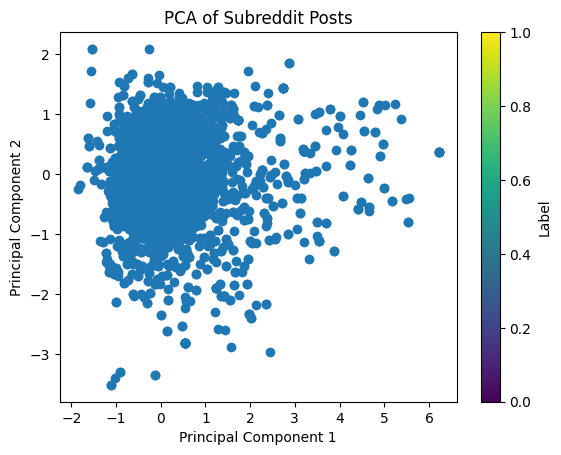

In [17]:

#use this function to calculate the average embedding of each post in the dataset


#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

# Convert the list of average embeddings into a numpy array
new_avg_embeddings = [avg_embedding(post, model) for post in data['cleaned_text']]
new_avg_embeddings = [embedding for embedding in new_avg_embeddings if embedding.shape == (100,)]
new_avg_embeddings = np.array(new_avg_embeddings)
# Check dimensions and pad if necessary
pca=PCA(n_components=2)

X_pca=pca.fit_transform(new_avg_embeddings)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()
#The data seems to be in a larger clump than before and also seems to be more centered than in the previous one
#There is not really a clear separation between the posts

Part 4: HuggingFace and BERT

In [17]:
!pip install transformers

In [18]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


c:\Users\rzhao\anaconda3\envs\is310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [1]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

NameError: name 'pipe' is not defined

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sentiments = []
for text in data['cleaned_text']:
    try:
        sentiments.append(pipe(text)[0])
    except:
        continue
sentiments

Token indices sequence length is longer than the specified maximum sequence length for this model (163 > 128). Running this sequence through the model will result in indexing errors


In [1]:
print(pipe(data['cleaned_text'])[0])

NameError: name 'pipe' is not defined

In [61]:
#look at ten sample posts and labels; do you agree with all of them? 
import random
indexes = [random.sample(range(0,len(data)),10)]

for i in indexes:
    print(data['cleaned_text'],sentiments('label'))


TypeError: 'list' object is not callable

In [23]:
#is the UIUC or Michigan subreddit more negative?
